In [3]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

AirPassengers" dataset contains the monthly totals of international airline passengers from 1949 to 1960. This dataset is freely available online and can be easily used for ARIMA forecasting.

Certainly! Let's walk through an example of forecasting using ARIMA (AutoRegressive Integrated Moving Average) with a step-by-step approach. Suppose we have monthly sales data for a company over a few years, and we want to forecast the sales for the next 12 months.

### Step-by-Step Example of ARIMA Forecasting

1. **Collect and Preprocess Data:**
   We need historical sales data. For this example, let's assume we have the sales data in a CSV file named `sales_data.csv` with two columns: `Month` and `Sales`.

2. **Load the Data:**
   We load the data into a pandas DataFrame and parse the dates.

3. **Visualize the Data:**
   Plot the time series to understand its structure and identify any trends or seasonality.

4. **Check Stationarity:**
   Use tests like the Augmented Dickey-Fuller test to check if the series is stationary. If not, we apply differencing.

5. **Determine ARIMA Parameters:**
   Use autocorrelation (ACF) and partial autocorrelation (PACF) plots to identify the order of AR, I, and MA components.

6. **Fit the ARIMA Model:**
   Fit the ARIMA model to the data using the determined parameters.

7. **Forecast Future Values:**
   Generate forecasts for the desired period.

Let's illustrate this with a Python script using the `pandas` and `statsmodels` libraries.

### Explanation of the Script

1. **Loading Data:** The data is loaded from a CSV file, and the `Month` column is parsed as dates and set as the index.
2. **Visualization:** The sales data is plotted to visualize the trend.
3. **Stationarity Check:** The Augmented Dickey-Fuller test is used to check for stationarity. If the series is not stationary, differencing is applied.
4. **Parameter Determination:** ACF and PACF plots help to identify the potential AR and MA terms.
5. **Model Fitting:** An ARIMA model is fitted to the sales data.
6. **Forecasting:** The model forecasts sales for the next 12 months, and the results are plotted.

This script is a basic example to get you started with ARIMA forecasting. Adjustments might be needed based on your specific data and requirements.

In [4]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


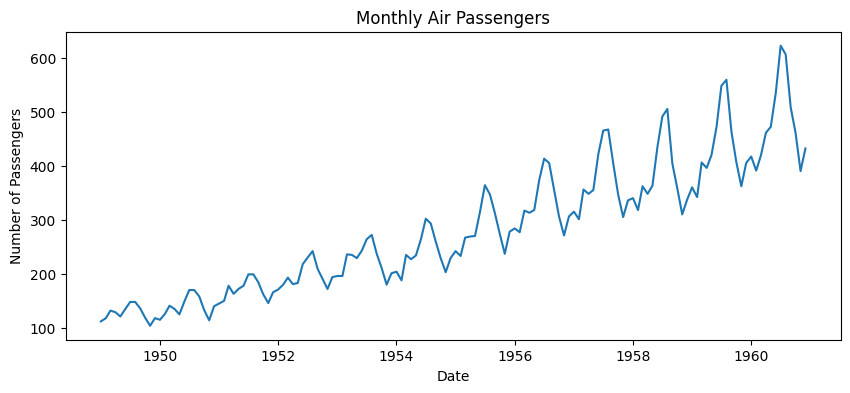

In [6]:
# Step 2: Load the data
sales = data['Passengers']

# Step 3: Visualize the data
plt.figure(figsize=(10, 4))
plt.plot(sales)
plt.title('Monthly Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

In [8]:
?adfuller

Signature:
adfuller(
    x,
    maxlag: 'int | None' = None,
    regression='c',
    autolag='AIC',
    store=False,
    regresults=False,
)
Docstring:
Augmented Dickey-Fuller unit root test.

The Augmented Dickey-Fuller test can be used to test for a unit root in a
univariate process in the presence of serial correlation.

Parameters
----------
x : array_like, 1d
    The data series to test.
maxlag : {None, int}
    Maximum lag which is included in test, default value of
    12*(nobs/100)^{1/4} is used when ``None``.
regression : {"c","ct","ctt","n"}
    Constant and trend order to include in regression.

    * "c" : constant only (default).
    * "ct" : constant and trend.
    * "ctt" : constant, and linear and quadratic trend.
    * "n" : no constant, no trend.

autolag : {"AIC", "BIC", "t-stat", None}
    Method to use when automatically determining the lag length among the
    values 0, 1, ..., maxlag.

    * If "AIC" (default) or "BIC", then the number of lags is chosen
      to 

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a time series is stationary. Stationarity is a crucial property for many time series models, including ARIMA, because the characteristics of a stationary time series (mean, variance, autocorrelation) are constant over time.

### Key Concepts

1. **Stationarity**: A time series is considered stationary if its statistical properties, such as mean, variance, and autocorrelation, do not change over time.
2. **Unit Root**: A time series has a unit root if it is non-stationary and exhibits a stochastic trend. The presence of a unit root means that shocks to the time series have a permanent effect.

### ADF Test Hypotheses

- **Null Hypothesis (\(H_0\))**: The time series has a unit root (i.e., it is non-stationary).
- **Alternative Hypothesis (\(H_1\))**: The time series does not have a unit root (i.e., it is stationary).

### Test Statistic

The ADF test statistic is a negative number. The more negative it is, the stronger the rejection of the null hypothesis. The test compares the test statistic to critical values for different confidence levels.

### ADF Test Formula

The ADF test is an extension of the Dickey-Fuller test and includes lagged terms of the dependent variable to account for higher-order autoregressive processes. The general form of the ADF test is:

\[ \Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \delta_1 \Delta y_{t-1} + \delta_2 \Delta y_{t-2} + \ldots + \delta_p \Delta y_{t-p} + \epsilon_t \]

Where:
- \( y_t \) is the time series.
- \( \Delta y_t \) is the first difference of \( y_t \).
- \( t \) is a time trend (optional).
- \( \alpha \), \( \beta \), \( \gamma \), and \( \delta_i \) are coefficients.
- \( p \) is the number of lagged difference terms.
- \( \epsilon_t \) is white noise error term.

### Conducting the ADF Test

1. **Estimate the test statistic**: Calculate the ADF test statistic based on the time series data.
2. **Compare with critical values**: The ADF test provides critical values at various confidence levels (1%, 5%, and 10%). Compare the test statistic with these critical values.
   - If the test statistic is less than the critical value, reject the null hypothesis (the series is stationary).
   - If the test statistic is greater than the critical value, do not reject the null hypothesis (the series is non-stationary).

### Interpreting the Output

- **ADF Statistic**: The test statistic value.
- **p-value**: The probability of observing the test statistic under the null hypothesis. A low p-value (< 0.05) indicates that you can reject the null hypothesis.
- **Critical Values**: Threshold values for different confidence levels (1%, 5%, and 10%).

In summary, the ADF test helps determine if a time series is stationary, which is a critical step in time series analysis and modeling.

In [10]:
# Step 4: Check stationarity
result = adfuller(sales)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpret the result
if result[1] < 0.05:
    print("Reject the null hypothesis - the series is stationary")
else:
    print("Fail to reject the null hypothesis - the series is non-stationary")

# If the series is not stationary, we apply differencing
sales_diff = sales.diff().dropna()

ADF Statistic: 0.8153688792060352
p-value: 0.9918802434376408
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Fail to reject the null hypothesis - the series is non-stationary


In [14]:
?plot_acf

Signature:
plot_acf(
    x,
    ax=None,
    lags=None,
    *,
    alpha=0.05,
    use_vlines=True,
    adjusted=False,
    fft=False,
    missing='none',
    title='Autocorrelation',
    zero=True,
    auto_ylims=False,
    bartlett_confint=True,
    vlines_kwargs=None,
    **kwargs,
)
Docstring:
Plot the autocorrelation function

Plots lags on the horizontal and the correlations on vertical axis.

Parameters
----------
x : array_like
    Array of time-series values
ax : AxesSubplot, optional
    If given, this subplot is used to plot in instead of a new figure being
    created.
lags : {int, array_like}, optional
    An int or array of lag values, used on horizontal axis. Uses
    np.arange(lags) when lags is an int.  If not provided,
    ``lags=np.arange(len(corr))`` is used.
alpha : scalar, optional
    If a number is given, the confidence intervals for the given level are
    returned. For instance if alpha=.05, 95 % confidence intervals are
    returned where the standard deviati

In [15]:
?plot_pacf

Signature:
plot_pacf(
    x,
    ax=None,
    lags=None,
    alpha=0.05,
    method='ywm',
    use_vlines=True,
    title='Partial Autocorrelation',
    zero=True,
    vlines_kwargs=None,
    **kwargs,
)
Docstring:
Plot the partial autocorrelation function

Parameters
----------
x : array_like
    Array of time-series values
ax : AxesSubplot, optional
    If given, this subplot is used to plot in instead of a new figure being
    created.
lags : {int, array_like}, optional
    An int or array of lag values, used on horizontal axis. Uses
    np.arange(lags) when lags is an int.  If not provided,
    ``lags=np.arange(len(corr))`` is used.
alpha : float, optional
    If a number is given, the confidence intervals for the given level are
    returned. For instance if alpha=.05, 95 % confidence intervals are
    returned where the standard deviation is computed according to
    1/sqrt(len(x))
method : str
    Specifies which method for the calculations to use:

    - "ywm" or "ywmle" : Yule

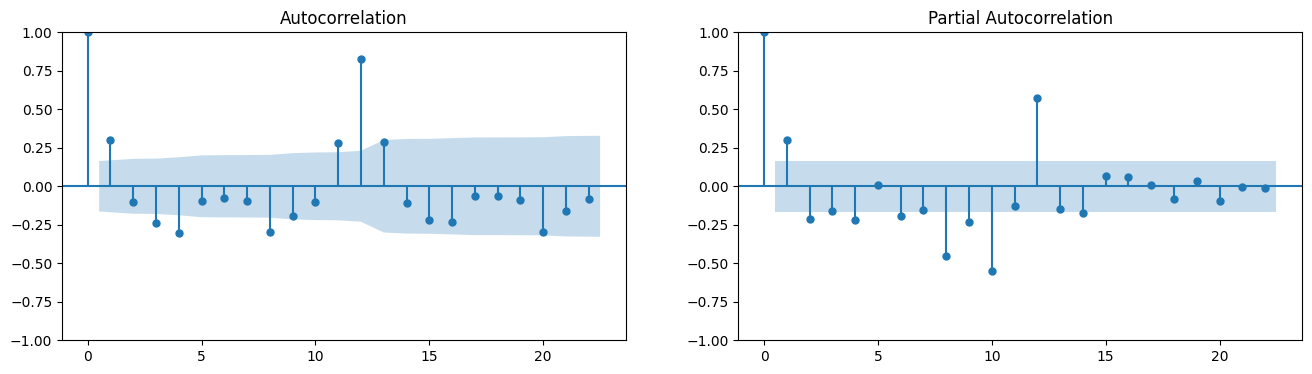

In [11]:
# Step 5: Determine ARIMA parameters using ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(sales_diff, ax=axes[0])
plot_pacf(sales_diff, ax=axes[1])
plt.show()

In [13]:
?ARIMA

Init signature:
ARIMA(
    endog,
    exog=None,
    order=(0, 0, 0),
    seasonal_order=(0, 0, 0, 0),
    trend=None,
    enforce_stationarity=True,
    enforce_invertibility=True,
    concentrate_scale=False,
    trend_offset=1,
    dates=None,
    freq=None,
    missing='none',
    validate_specification=True,
)
Docstring:     
Autoregressive Integrated Moving Average (ARIMA) model, and extensions

This model is the basic interface for ARIMA-type models, including those
with exogenous regressors and those with seasonal components. The most
general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows
all specialized cases, including

- autoregressive models: AR(p)
- moving average models: MA(q)
- mixed autoregressive moving average models: ARMA(p, q)
- integration models: ARIMA(p, d, q)
- seasonal models: SARIMA(P, D, Q, s)
- regression with errors that follow one of the above ARIMA-type models

Parameters
----------
endog : array_like, optional
    The observed time-se

In [12]:
# Step 6: Fit the ARIMA model
# For example, let's assume after analysis we decided on ARIMA(1,1,1)
model = ARIMA(sales, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Sun, 09 Jun 2024   AIC                           1394.683
Time:                        13:39:29   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

c:\Users\Cikal Merdeka\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Cikal Merdeka\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Cikal Merdeka\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


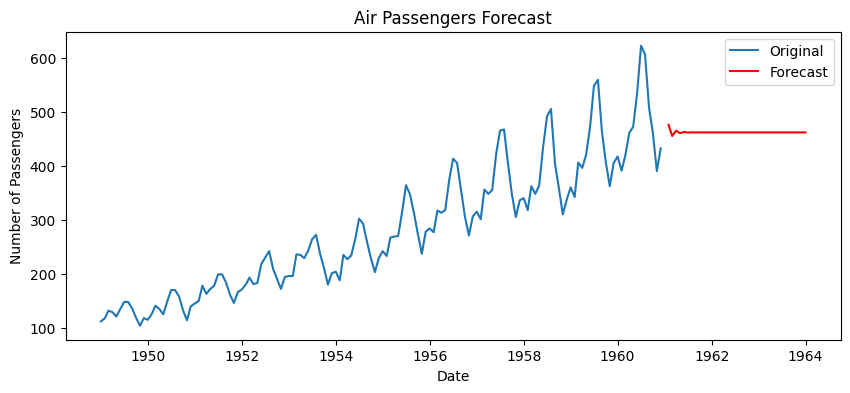

In [20]:
# Step 7: Forecast future values
forecast_steps = 36
forecast = model_fit.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=sales.index[-1], periods=forecast_steps+1, freq='ME')[1:]

# Visualize the forecast
plt.figure(figsize=(10, 4))
plt.plot(sales, label='Original')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('Air Passengers Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()